### Import Required Packages

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

Found GPU at: /device:GPU:0


### Import MNIST Data

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Choose 10000 random images
training_rows = np.random.choice(a = x_train.shape[0], size = 10000, replace = False)
testing_rows = np.random.choice(a = x_test.shape[0], size = 1000, replace = False)

X_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])[training_rows, :]
X_test = x_test.reshape(x_test.shape[0], x_train.shape[1] * x_train.shape[2])[testing_rows, :]

y_train = y_train[training_rows]
y_test = y_test[testing_rows]

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

X_train = X_train / 255.0
X_test = X_test / 255.0

(10000, 784)


### Add Noise to Training Data

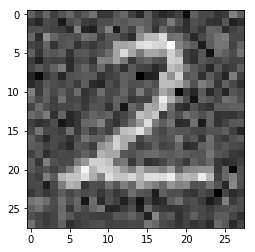

In [18]:
noise_factor = .2

X_train_noisy = X_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = X_train.shape)

rand_image = np.random.choice(a = X_train_noisy.shape[0], size = 1)
plt.imshow(X_train_noisy[rand_image].reshape(28, 28), cmap = 'gray')

### Create Model in Keras

In [34]:
model = keras.Sequential()

model.add(keras.layers.Dense(units = 1000, input_dim = 784, activation = 'relu'))
model.add(keras.layers.Dense(units = 784, input_dim = 1000, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'SGD')

model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_31 (Dense)             (None, 784)               784784    
Total params: 1,569,784
Trainable params: 1,569,784
Non-trainable params: 0
_________________________________________________________________


### Train Model

In [0]:
model.fit(X_train_noisy, X_train, batch_size = 32, epochs = 300)

### Check Model Output

Original Image


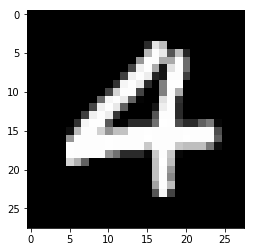

Noisy Image


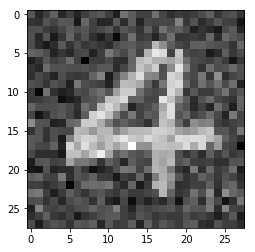

De-Noised Image


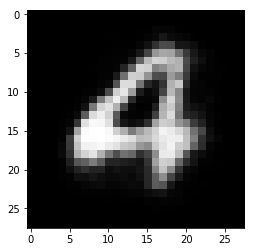

In [43]:
rand_image = np.random.choice(a = X_train_noisy.shape[0], size = 1)

print('Original Image')
plt.imshow(X_train[rand_image].reshape(28, 28), cmap = 'gray')
plt.show()

print('Noisy Image')
plt.clf()
plt.imshow(X_train_noisy[rand_image].reshape(28, 28), cmap = 'gray')
plt.show()

print('De-Noised Image')
plt.clf()
plt.imshow(model.predict(X_train_noisy[rand_image]).reshape(28, 28), cmap = 'gray')
plt.show()